<img src="swiggy Image.jpg" width="1300" height="450">

# Business Understanding
Swiggy is an Indian online food ordering and delivery platform. Founded in July 2014,  Swiggy is based in Bangalore and operates in 500+ Indian cities as of September 2021. 

Our extracted data is from [Swiggy](https://www.swiggy.com/#city-link)

it is in Json format.

#### Load the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

# Data Collection
### Load the json file

In [2]:
# Opening JSON file
#f = open('/kaggle/input/swiggy-restaurants-dataset/data.json')
f = open('Swiggy/data.json')


# returns JSON object as a dictionary
data = json.load(f)

#print(data.keys())

f.close()

In [ ]:
type(data)

dict

# Data Preparation

* Loaded Json file, returns as a dictionary.
* `data` keys is the city name, where Swiggy services are available in all over india
* Store all the cities in a list `Cities`.

In [ ]:
Cities = list(data.keys())
len(Cities)

623

* **There are 623 Main cities in india according to the listed name on Swiggy webpage**

In [ ]:
c = Cities[453]

print('City Name :',c)

#print(data[c].keys())
print('Link :',data[c]['link'])
id = list(data[c]['restaurants'].keys())
print('First Restaurant id            :',id[0])
# print(data[c]['restaurants'][id[0]].keys())
print('First Restaurant Name          :', data[c]['restaurants'][id[0]]['name'])
print('First Restaurant Rating        :', data[c]['restaurants'][id[0]]['rating'])
print('First Restaurant Rating_Counts :', data[c]['restaurants'][id[0]]['rating_count'])
print('First Restaurant Cost          :', data[c]['restaurants'][id[0]]['cost'])
print('First Restaurant Address       :', data[c]['restaurants'][id[0]]['address'])
print('First Restaurant Cuisine       :', data[c]['restaurants'][id[0]]['cuisine'])
print('First Restaurant License No.   :', data[c]['restaurants'][id[0]]['lic_no'])
#print('First Restaurant Menu          :', Menu)

Menu = list(data[c]['restaurants'][id[0]]['menu'].keys())
print('*'*45,data[c]['restaurants'][id[0]]['name'],',',c,'- Menu','*'*45)

for item in Menu:
    print(item)
    Sub_menu = list(data[c]['restaurants'][id[0]]['menu'][item].keys())
    for sub_item in Sub_menu :
        print(sub_item,'>>> Price :',data[c]['restaurants'][id[0]]['menu'][item][sub_item]['price'], end =' | ')
        print('veg_or_non_veg :',data[c]['restaurants'][id[0]]['menu'][item][sub_item]['veg_or_non_veg'])
    print('-'*100)
       
                                                          
print('First Restaurant Link          :',data[c]['restaurants'][id[0]]['link'])

City Name : Patna
Link : https://www.swiggy.com/city/patna
First Restaurant id            : 254859
First Restaurant Name          : Biryani By Kilo
First Restaurant Rating        : 4.1
First Restaurant Rating_Counts : 500+ ratings
First Restaurant Cost          : ₹ 700
First Restaurant Address       : Biryani By Kilo, Commercial First Floor, 21, Patliputra Colony, Opp. UNICEF OFFICE, Patna- 800013, Bihar
First Restaurant Cuisine       : Biryani,Mughlai
First Restaurant License No.   : 10420000000041
********************************************* Biryani By Kilo , Patna - Menu *********************************************
Recommended
Peshawari Chole Biryani [1/2 Kg] Serves 1-2 >>> Price : 370 | veg_or_non_veg : Veg
Chicken Hyderabadi Dum Biryani [1/2 Kg] Serves 1-2 >>> Price : 485 | veg_or_non_veg : Non-veg
Chicken Boneless Dum Biryani [1/2 Kg] Serves 1-2 >>> Price : 545 | veg_or_non_veg : Non-veg
Malamaal Murg Dum Biryani [1/2 Kg] Serves 1-2 >>> Price : 625 | veg_or_non_veg : Non-veg
Mu

## Create DataFrame from  Dictionary "data"

In [6]:
Data = pd.DataFrame()                               # Create an Empty Dataframe

for city in Cities:
    try:
        # Convert the city-wise restaurant data to pandas Dataframe
        DF = pd.DataFrame(data[city]['restaurants']).T  
        
        # add City column for each restaurants in that city
        City = [city for i in range(DF.shape[0])]
        DF['City'] = City
        
        # Because no sub-region so considering city as sub-region
        SubRegion = City                                          
        DF['SubRegion'] = SubRegion
        
        # Concatenate to main Dataframe
        Data = pd.concat([Data,DF])
        
    except:
        
        Subregions = list(data[city].keys())
        for region in Subregions:
            
            # Convert the city-wise restaurant data to pandas Dataframe
            DF = pd.DataFrame(data[city][region]['restaurants']).T
            
            # City
            City = [city for i in range(DF.shape[0])]
            # Add City column for each restaurants in that city
            DF['City'] = City
            
            # Sub-region
            SubRegion = [region for i in range(DF.shape[0])]
            
            # add sub-region column for each restaurants in that city
            DF['SubRegion'] = SubRegion
            Data = pd.concat([Data,DF])
        
Data.shape

(181404, 13)

## Menu
### Create a function to check menu price and type from `Data` dataframe by index values

In [7]:
def Menu(Data, i):
    Menu = list(Data.menu[i].keys())
    print('*'*35,Data['name'][i],',',Data['SubRegion'][i],Data['City'][i],'- Menu','*'*35)

    for item in Menu:
        print(item)
        Sub_menu = list(Data.menu[i][item].keys())
        for sub_item in Sub_menu :
            print(sub_item,'>>> Price :',Data.menu[i][item][sub_item]['price'], end =' | ')
            print('veg_or_non_veg :',Data.menu[i][item][sub_item]['veg_or_non_veg'])
        print('-'*100)
        
Menu(Data, 11223)

*********************************** Food Decker , Koramangala Bangalore - Menu ***********************************
Pasta
Fried Chicken Maggi >>> Price : 100 | veg_or_non_veg : Non-veg
Fried Veg Maggi >>> Price : 80 | veg_or_non_veg : Veg
Egg Maggi >>> Price : 80 | veg_or_non_veg : Non-veg
Veg Maggi >>> Price : 60 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
Sandwiches
Chicken Fried Sandwich >>> Price : 150 | veg_or_non_veg : Non-veg
Chicken Sandwich >>> Price : 100 | veg_or_non_veg : Non-veg
Bread Butter Cheese >>> Price : 60 | veg_or_non_veg : Veg
Aloo Cheese Sandwich >>> Price : 100 | veg_or_non_veg : Veg
Veg  Cheese Grill Sandwich >>> Price : 100 | veg_or_non_veg : Veg
Veg Sandwich >>> Price : 80 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
Rolls
Chowmein Roll >>> Price : 100 | veg_or_non_veg : Veg
Malai Tikka Roll >>> Price : 

In [8]:
### Save our original Dataframe
Data.to_csv('Swiggy_data.csv')

In [9]:
# Read the saved dataframe
df = pd.read_csv('Swiggy_data.csv')

In [10]:
menus = []
for i in range(Data.shape[0]):
    try:
        menus.append(', '.join([key for key in Data.menu[i].keys()]))
    except:
        menus.append(np.NaN)
print(len(menus))
print(df.shape[0])

df['menu'] = menus

181404
181404


# Data Cleaning 
### Check Duplicates 
* Restaurant 'id' should be always unique
* Drop the duplicates rows

In [11]:
df = df.rename(columns={'Unnamed: 0':'id', 'name':'Restaurant'})
df.drop_duplicates(subset='id', keep='first', inplace = True)
#df.set_index('id', inplace=True)
df.shape

(160621, 14)

### Rearrange the column order

In [12]:
df = df.loc[:,['id','Restaurant','City','SubRegion','cost','cuisine','rating','rating_count','lic_no',
               'address','menu','link', 'type', 'price']]
df.head()

,id,Restaurant,City,SubRegion,cost,cuisine,rating,rating_count,lic_no,address,menu,link,type,price
0,567335,AB FOODS POINT,Abohar,Abohar,₹ 200,"Beverages,Pizzas",--,Too Few Ratings,22122652000138,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...","Burger, Pasta Must Try, Chiness Appetizer, Fri...",https://www.swiggy.com/restaurants/ab-foods-po...,NaN,NaN
1,531342,Janta Sweet House,Abohar,Abohar,₹ 200,"Sweets,Bakery",4.4,50+ ratings,12117201000112,"Janta Sweet House, Bazar No.9, Circullar Road,...","Breakfast, Drinks (beverages), Combos, Sweets,...",https://www.swiggy.com/restaurants/janta-sweet...,NaN,NaN
2,158203,theka coffee desi,Abohar,Abohar,₹ 100,Beverages,3.8,100+ ratings,22121652000190,"theka coffee desi, sahtiya sadan road city","Recommended, Family Binge Combos, Hot Coffee, ...",https://www.swiggy.com/restaurants/theka-coffe...,NaN,NaN
3,187912,Singh Hut,Abohar,Abohar,₹ 250,"Fast Food,Indian",3.7,20+ ratings,22119652000167,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR","Recommended, Soya Chaap, Gravy Item, Chinese H...",https://www.swiggy.com/restaurants/singh-hut-n...,NaN,NaN
4,543530,GRILL MASTERS,Abohar,Abohar,₹ 250,"Italian-American,Fast Food",--,Too Few Ratings,12122201000053,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","Veg Burgers, Non-Veg Burgers, Veg Wraps, Non V...",https://www.swiggy.com/restaurants/grill-maste...,NaN,NaN


### Check the null values

In [13]:
Null = df.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/df.shape[0])*100, 0)
Null

,index,Null,% Null
0,id,0,0.0
1,Restaurant,101,0.0
2,City,0,0.0
3,SubRegion,0,0.0
4,cost,12177,8.0
5,cuisine,12145,8.0
6,rating,101,0.0
7,rating_count,12132,8.0
8,lic_no,12274,8.0
9,address,12132,8.0


* `Type & price` columns have more than 90% null values
* Drop `Type & price` columns
* Drop null values row also.

In [14]:
df = df.drop(['type','price'], axis =1)
df.dropna(inplace = True, axis = 0)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df.shape

(148290, 12)

### Cleaning the data
`Noida and Noida-1` are the same city to Provide a single name `Noida`

In [15]:
df.City.replace(['Noida-1','Noida'],'Noida',inplace=True)

# Exploratory Data Analysis

## Rating

In [16]:
Rating = []
for i in range(df.shape[0]):
    try:
        Rating.append(float(df.rating[i]))     
    except:
        #print(Data.rating[i])
        if df.rating[i] == '--' or 'NA':
            Rating.append(np.NaN)                # Where rating is not givem keep it null
        else:
            print(df.rating[i])
print(len(Rating))
print(df.shape[0])
df.rating = Rating
df.rating.dtypes

148290
148290


dtype('float64')

### 1. Restaurant with Maximum rating throughout the dataset
* Restaurant with Maximum rating throughout the dataset are `Pablo Premium Kitchen`, `The best diet corner`, `Creams and Bites`.....
* There are `209` Restaurants, which has the maximum `5.0` rating.

In [17]:
print('The maximum rating Restaurant are:')
df[df.rating ==df.rating.max()][['Restaurant', 'rating']]

The maximum rating Restaurant are:


,Restaurant,rating
757,Pablo Premium Kitchen,5.0
1021,The best diet corner,5.0
9758,Creams and Bites,5.0
9808,Bansal's Thali & Combo Meals,5.0
10239,GOWHEY- HEALTHY DESSERT COMPANY,5.0
...,...,...
140515,Chenab Kitchen,5.0
146038,Cream House,5.0
147204,HINDUSTANI BURGER,5.0
147205,KEBAB NATION,5.0


### Restaurant Counts w.r.t rating

* The maximum Restaurants are of `4.0` rating.
* The minimum Restaurants are of `1.0` rating.

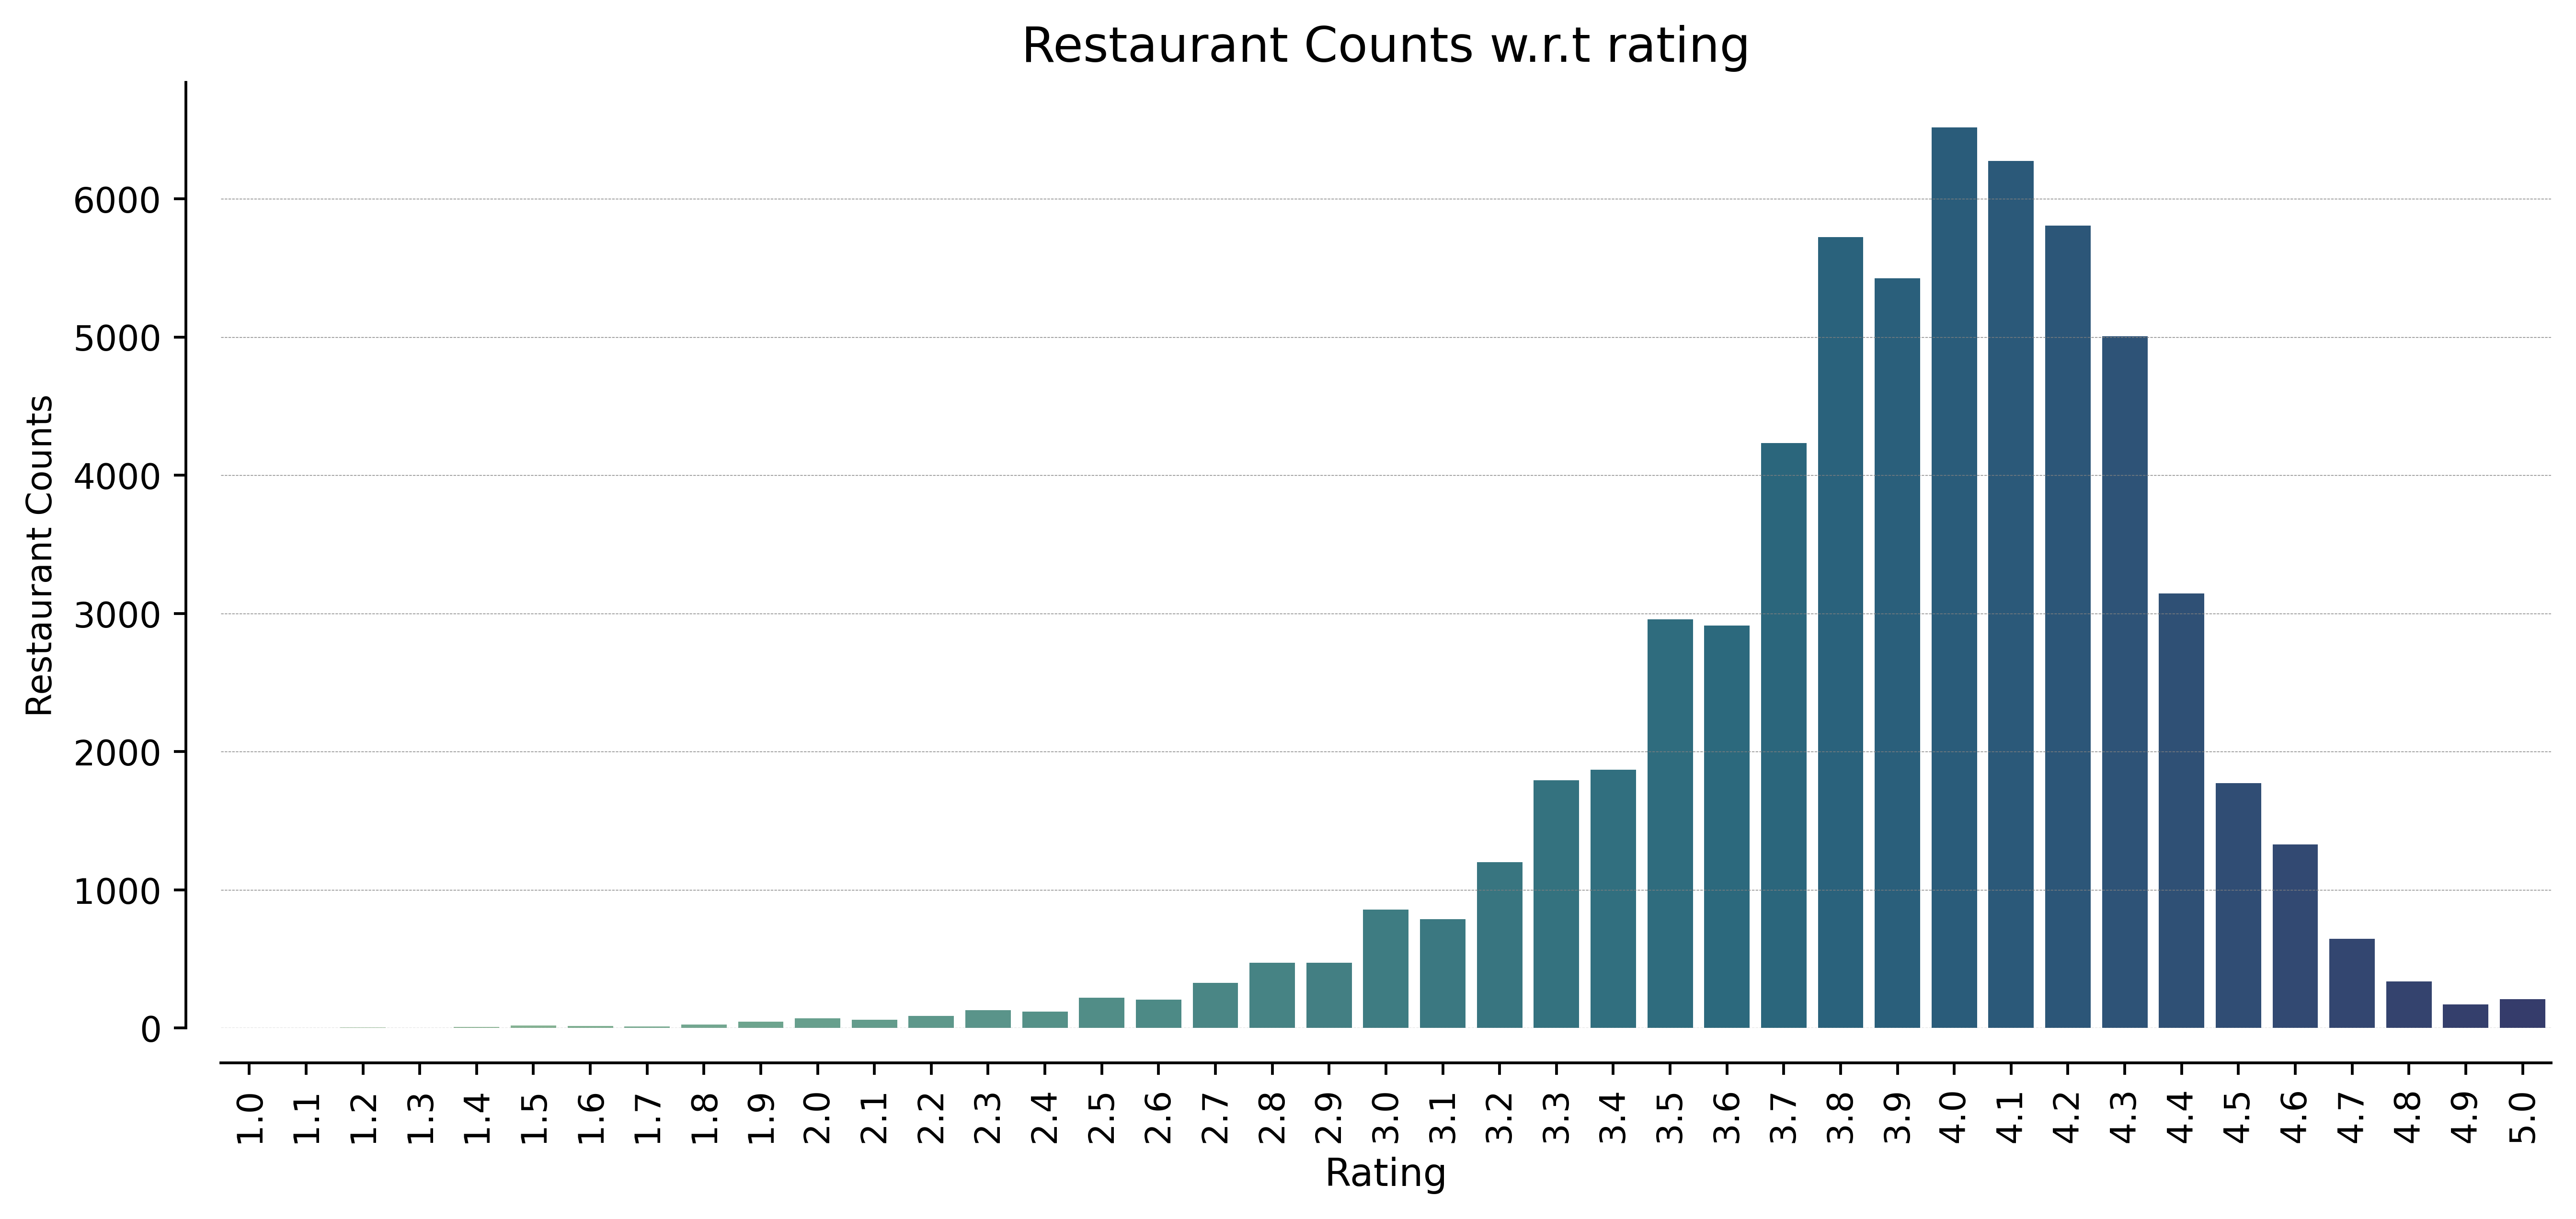

In [18]:
data = df.groupby('rating', as_index = False).agg('count')[['rating','Restaurant']]

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)   

#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = data,
           x='rating',
           y = 'Restaurant',
           palette= "crest"#'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 

# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Rating", fontsize = 11)                                # Set X label         
plt.ylabel("Restaurant Counts", fontsize = 10)                     # Set Y label
plt.title('Restaurant Counts w.r.t rating', fontsize = 14)         # Set title
plt.show()

### Let's check How many Restaurant's lies between `0-1.0`, `1.1-2.0`, `2.1-3.0`, `3.1-4.0`, `4.1-5.0` ratings

In [19]:
R = df.groupby('rating', as_index = False).agg('count').rename({'Restaurant':'R_Counts'}, axis=1)[['rating','R_Counts']]

R = {'<1.0':R[R['rating']<=1.0].R_Counts.sum(),
    '1.1-2.0':R[(R['rating']>1.0) & (R['rating']<=2.0)].R_Counts.sum(),
    '2.1-3.0':R[(R['rating']>2.0) & (R['rating']<=3.0)].R_Counts.sum(),
    '3.1-4.0':R[(R['rating']>3.0) & (R['rating']<=4.0)].R_Counts.sum(),
    '4.1-5.0':R[(R['rating']>4.0) & (R['rating']<=5.0)].R_Counts.sum()
    }

R = pd.DataFrame((R.keys(),R.values()), index=['Rating', 'Counts']).T

In [20]:
fig = px.pie(R,
       names='Rating',
       values='Counts',
       labels={'Counts':'Restaurant Counts'},
       template='plotly_dark',
       color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,
       title='<b> Restaurants Counts as per Rating<b>'
      )

fig.show()

## City
### 2. Number of cities with least number of restaurants listed?
* There are `5 cities` with least number of restaurants listed.

In [21]:
Bottom = df.City.value_counts(ascending=True).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1)

Bottom[Bottom['Counts']==Bottom['Counts'].min()]

,City,Counts
0,Hampi,1
1,Kohima,1
2,Naharlagun,1
3,Manali,1
4,Rangpo,1


* There are `5 cities`, Where only one Restaurants are listed. i.e `Hampi`,`Kohima`, `Naharlagun`, `Manali`, `Rangpo`

### Least Popular Cities as per Restaurants Counts

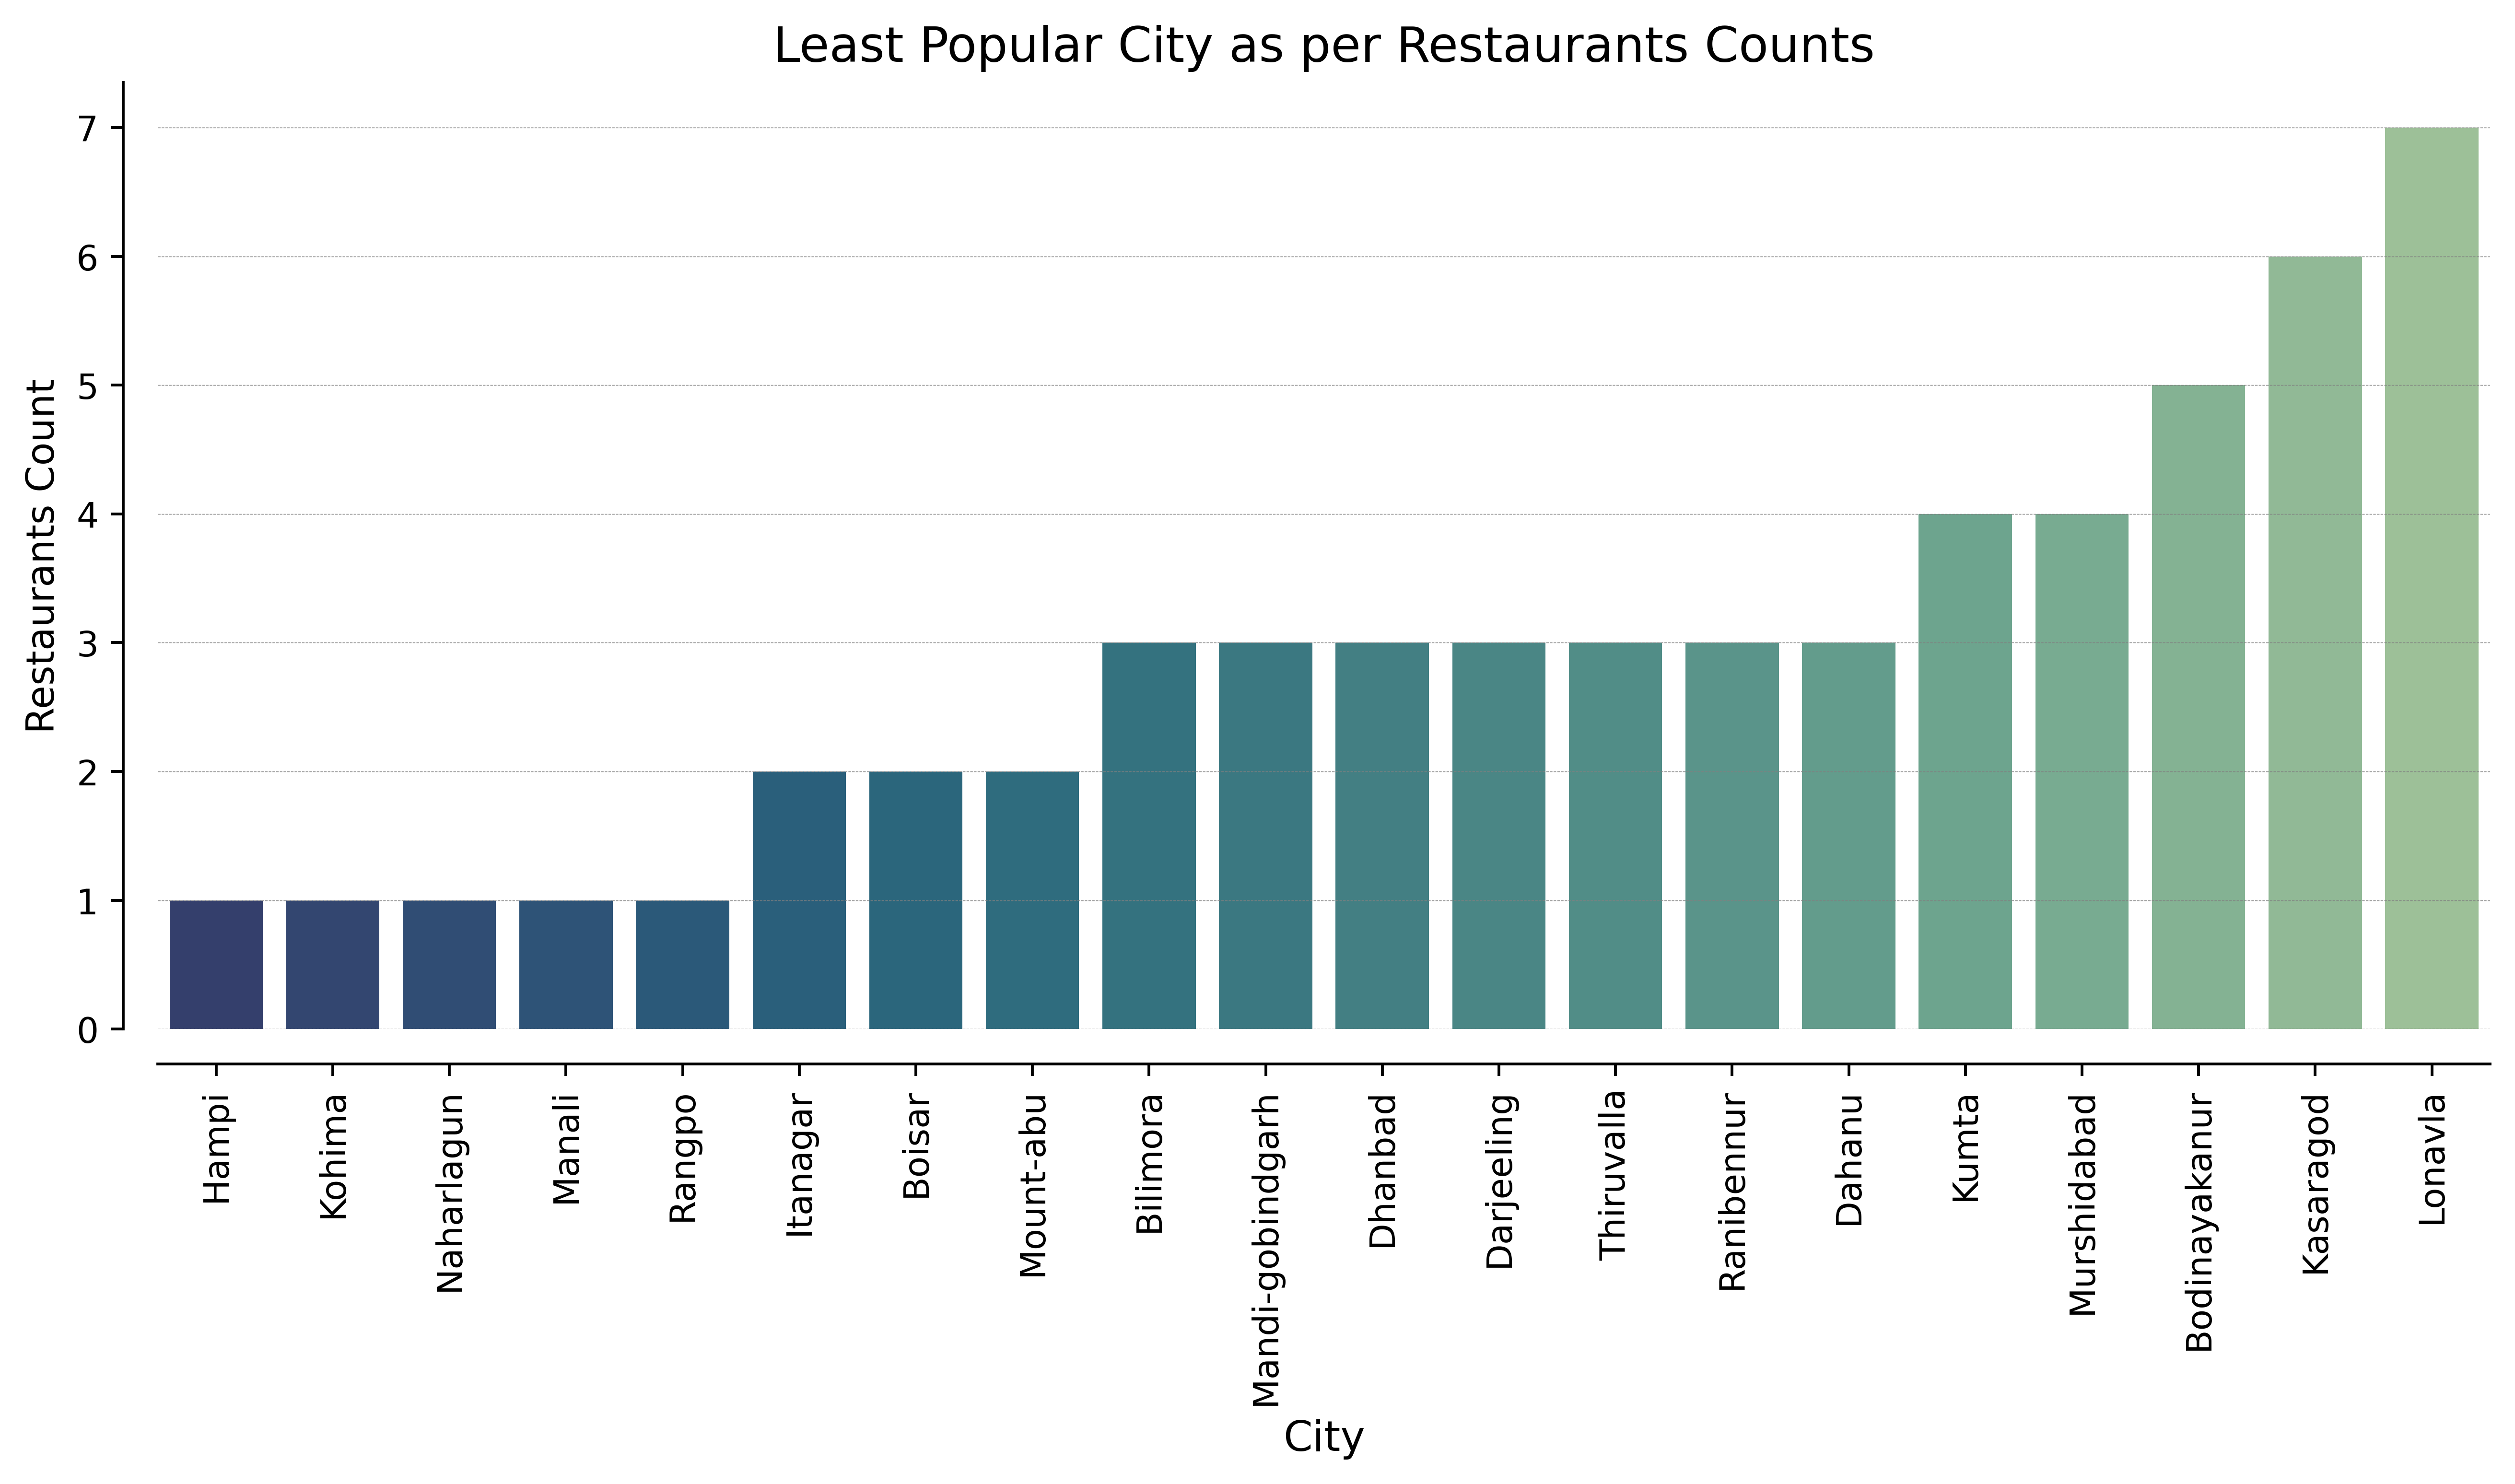

In [22]:
# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = Bottom.head(20),
           x='City',
           y = 'Counts',
           palette= "crest_r"#'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("City", fontsize = 12)                                                # Set X label         
plt.ylabel("Restaurants Count", fontsize = 11)                                   # Set Y label
plt.title('Least Popular City as per Restaurants Counts', fontsize = 14)         # Set title
plt.show()

### 3. Top 10 cities as per the number of restaurants listed?
* Top 10 cities as per the number of restaurants listed are **`Bangalore`, `Delhi`, `Pune`, `Hyderabad`, `Chennai`, `Kolkata`, `Mumbai`, `Ahmedabad`, `Chandigarh` & `Lucknow`**.

In [23]:
Top = df.City.value_counts(ascending=False).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1).head(10)

fig =px.bar(Top,
            x= 'City',
            y= 'Counts',
            labels = {'Counts':'Restaurants Counts'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.Dark24_r,
            title='<b>Top 10 Cities w.r.t Restaurants listed')

fig.show()

## Cuisines

In [24]:
df.cuisine.unique()

array(['Beverages,Pizzas', 'Sweets,Bakery', 'Beverages', ...,
       'Biryani,Thai', 'South American,Andhra',
       'Barbecue,Italian-American'], dtype=object)

### 4. Most popular Cuisines served throughout the dataset? 
[In terms of frequency]

### A. For the unique Cuisine pair


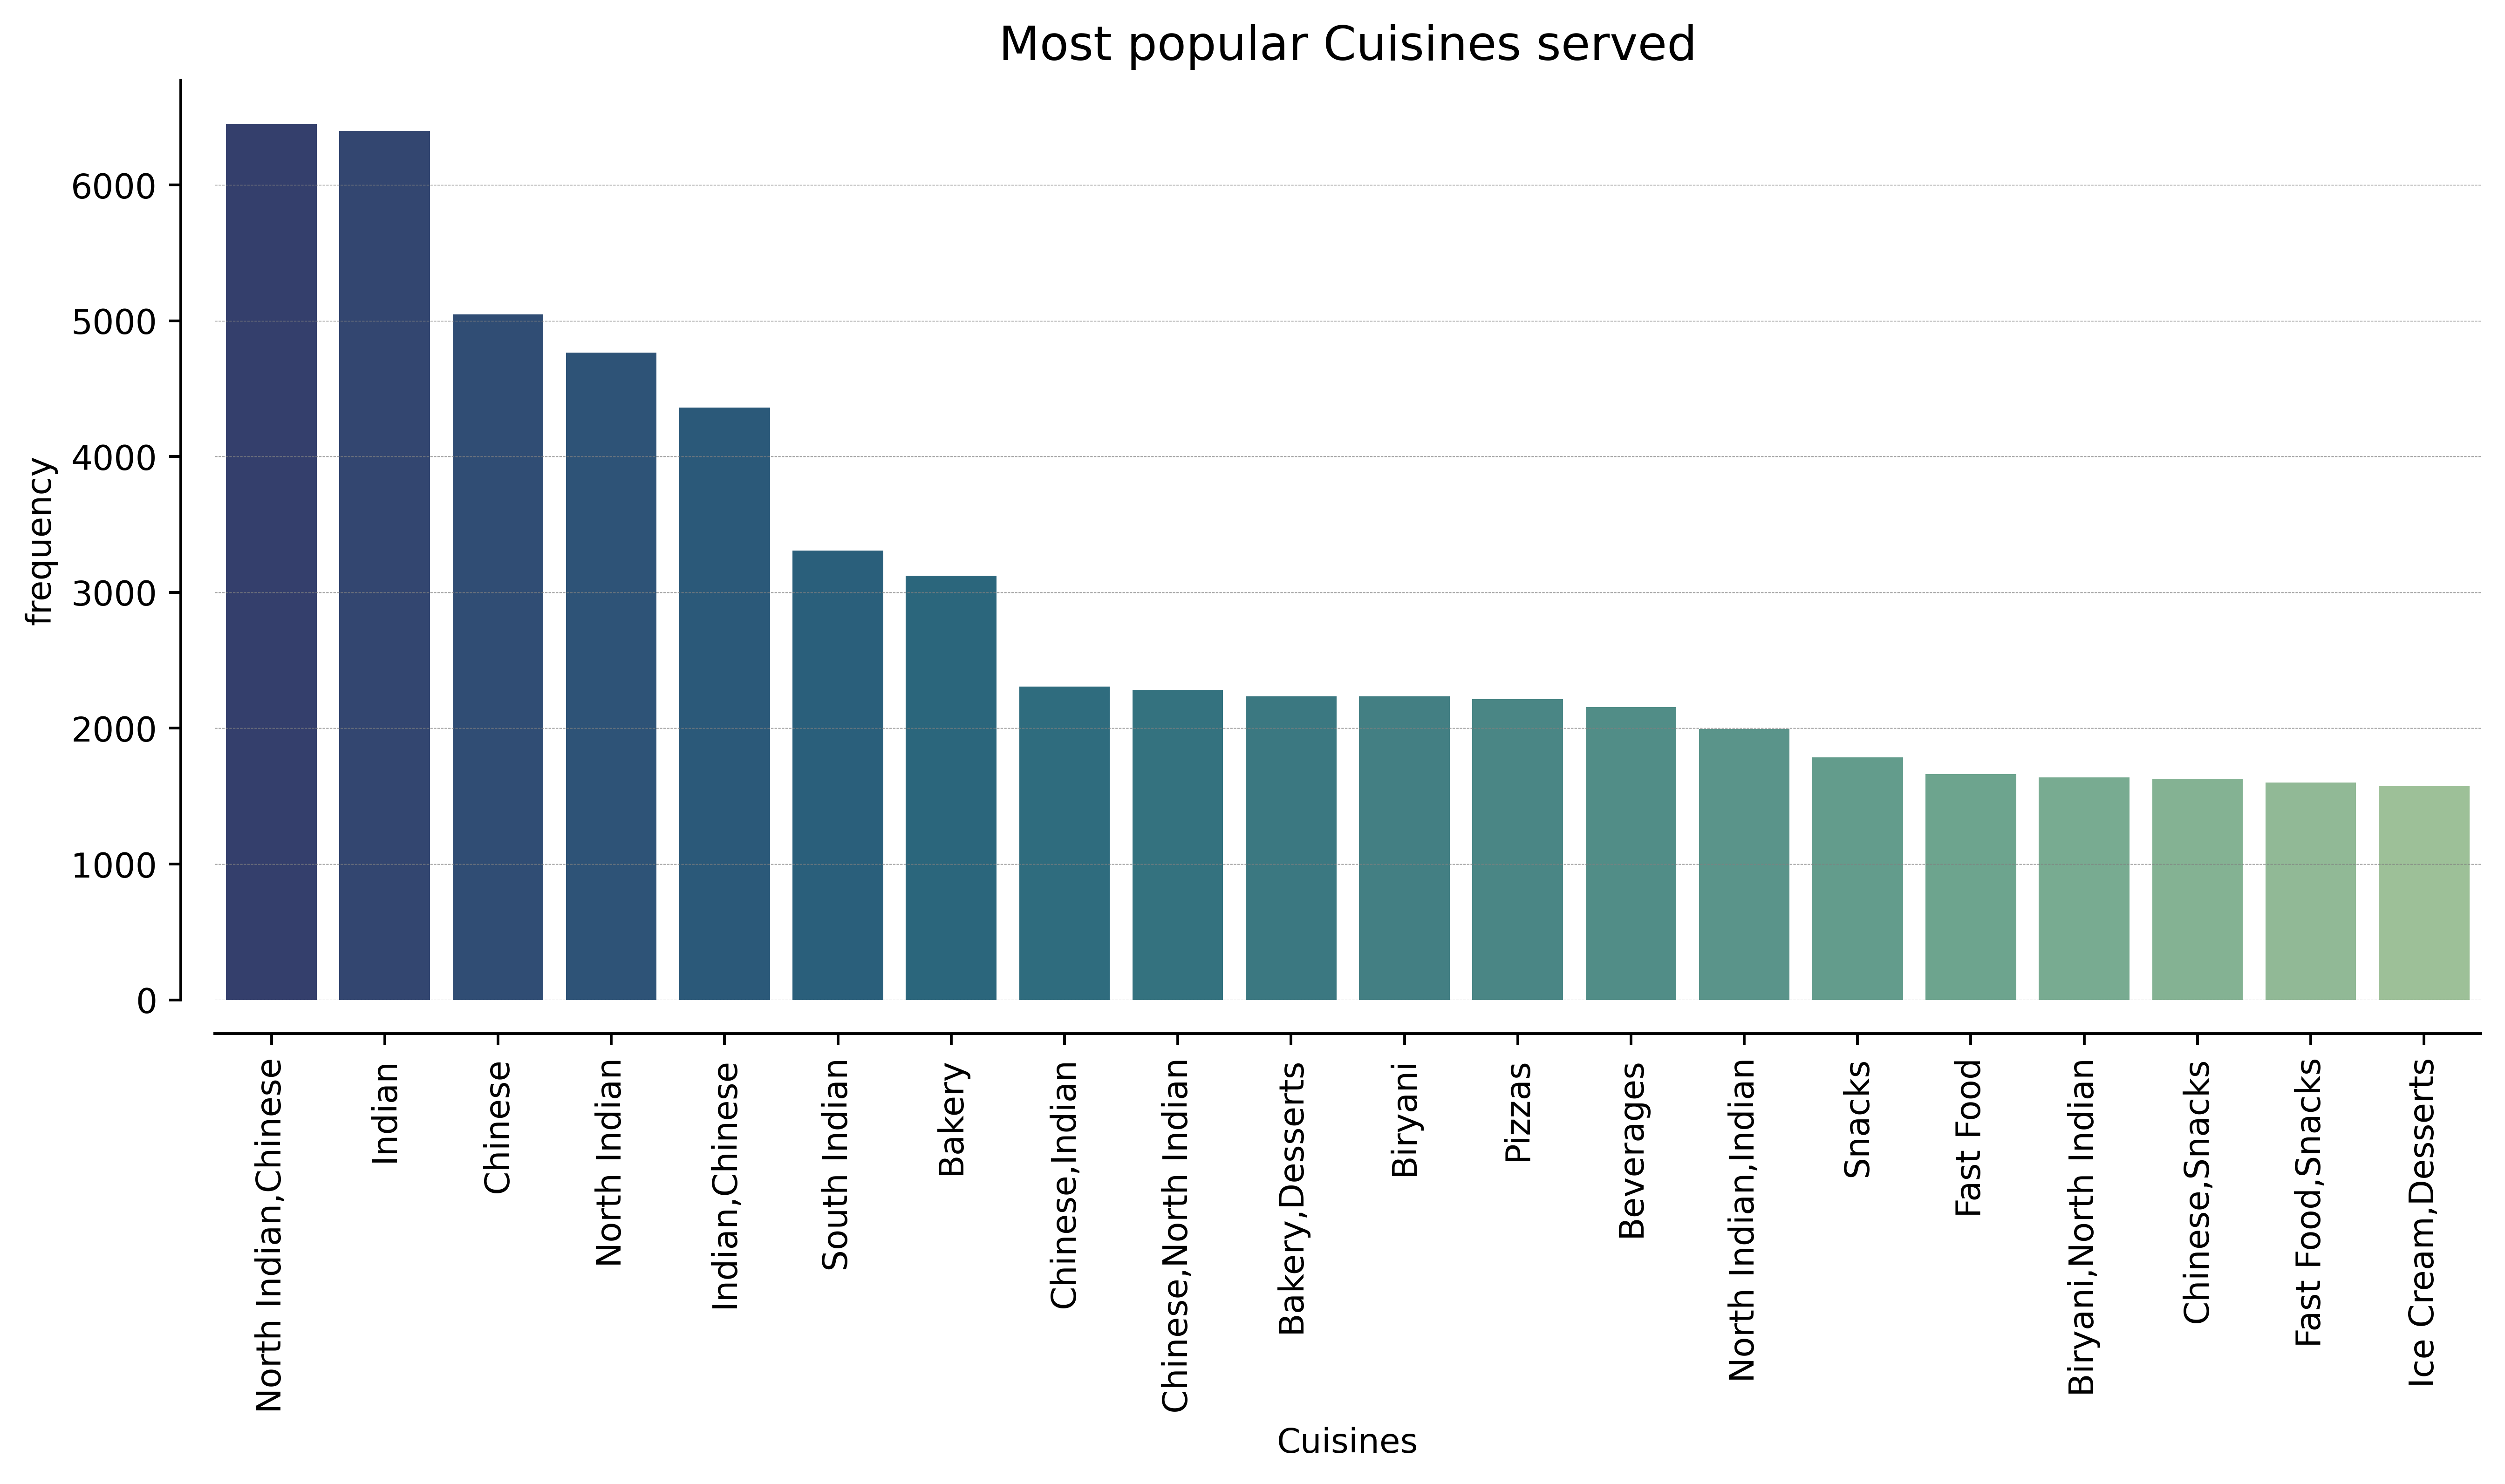

In [25]:
c = df.cuisine.value_counts().reset_index().rename({'index':'Cuisine','cuisine':'frequency'}, axis =1)

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = c.head(20),
           x='Cuisine',
           y = 'frequency',
           palette= "crest_r" #'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Cuisines", fontsize = 10)                                   # Set X label         
plt.ylabel("frequency", fontsize = 10)                                  # Set Y label
plt.title('Most popular Cuisines served', fontsize = 14)                # Set title
plt.show()

* **`North Indian, Chinese` is the most popular cuisines pair.**

### B. For the unique Cuisine

**Unique Cuisine in the dataset**

In [26]:
Cuisines = set()                     # Set to store unique elements only

# Store unique genre to Genre set()
for c in df['cuisine']:
    l = c.split(',')
    for item in l:
        Cuisines.add(item)
len(Cuisines)

127

* There are 127 unique cuisine

### Let's find the frequency of the each unique cuisine served.

In [27]:
# Create a dictionary with unique Cuisine key and 0  as values
CUISINE = {}
for c in Cuisines:
    CUISINE[c] = 0

# Add the count to values of respective CUISINE key
for ci in df['cuisine']:
    l = ci.split(',')
    for cs in l:
        CUISINE[cs] +=1

# Create Dataframe from CUISINE dictionary key and values
Cuisine = pd.DataFrame(list(zip(CUISINE.keys(), CUISINE.values())),columns =['Cuisine', 'Restaurant_Counts'])

### Top 10 Most popular Cuisine served

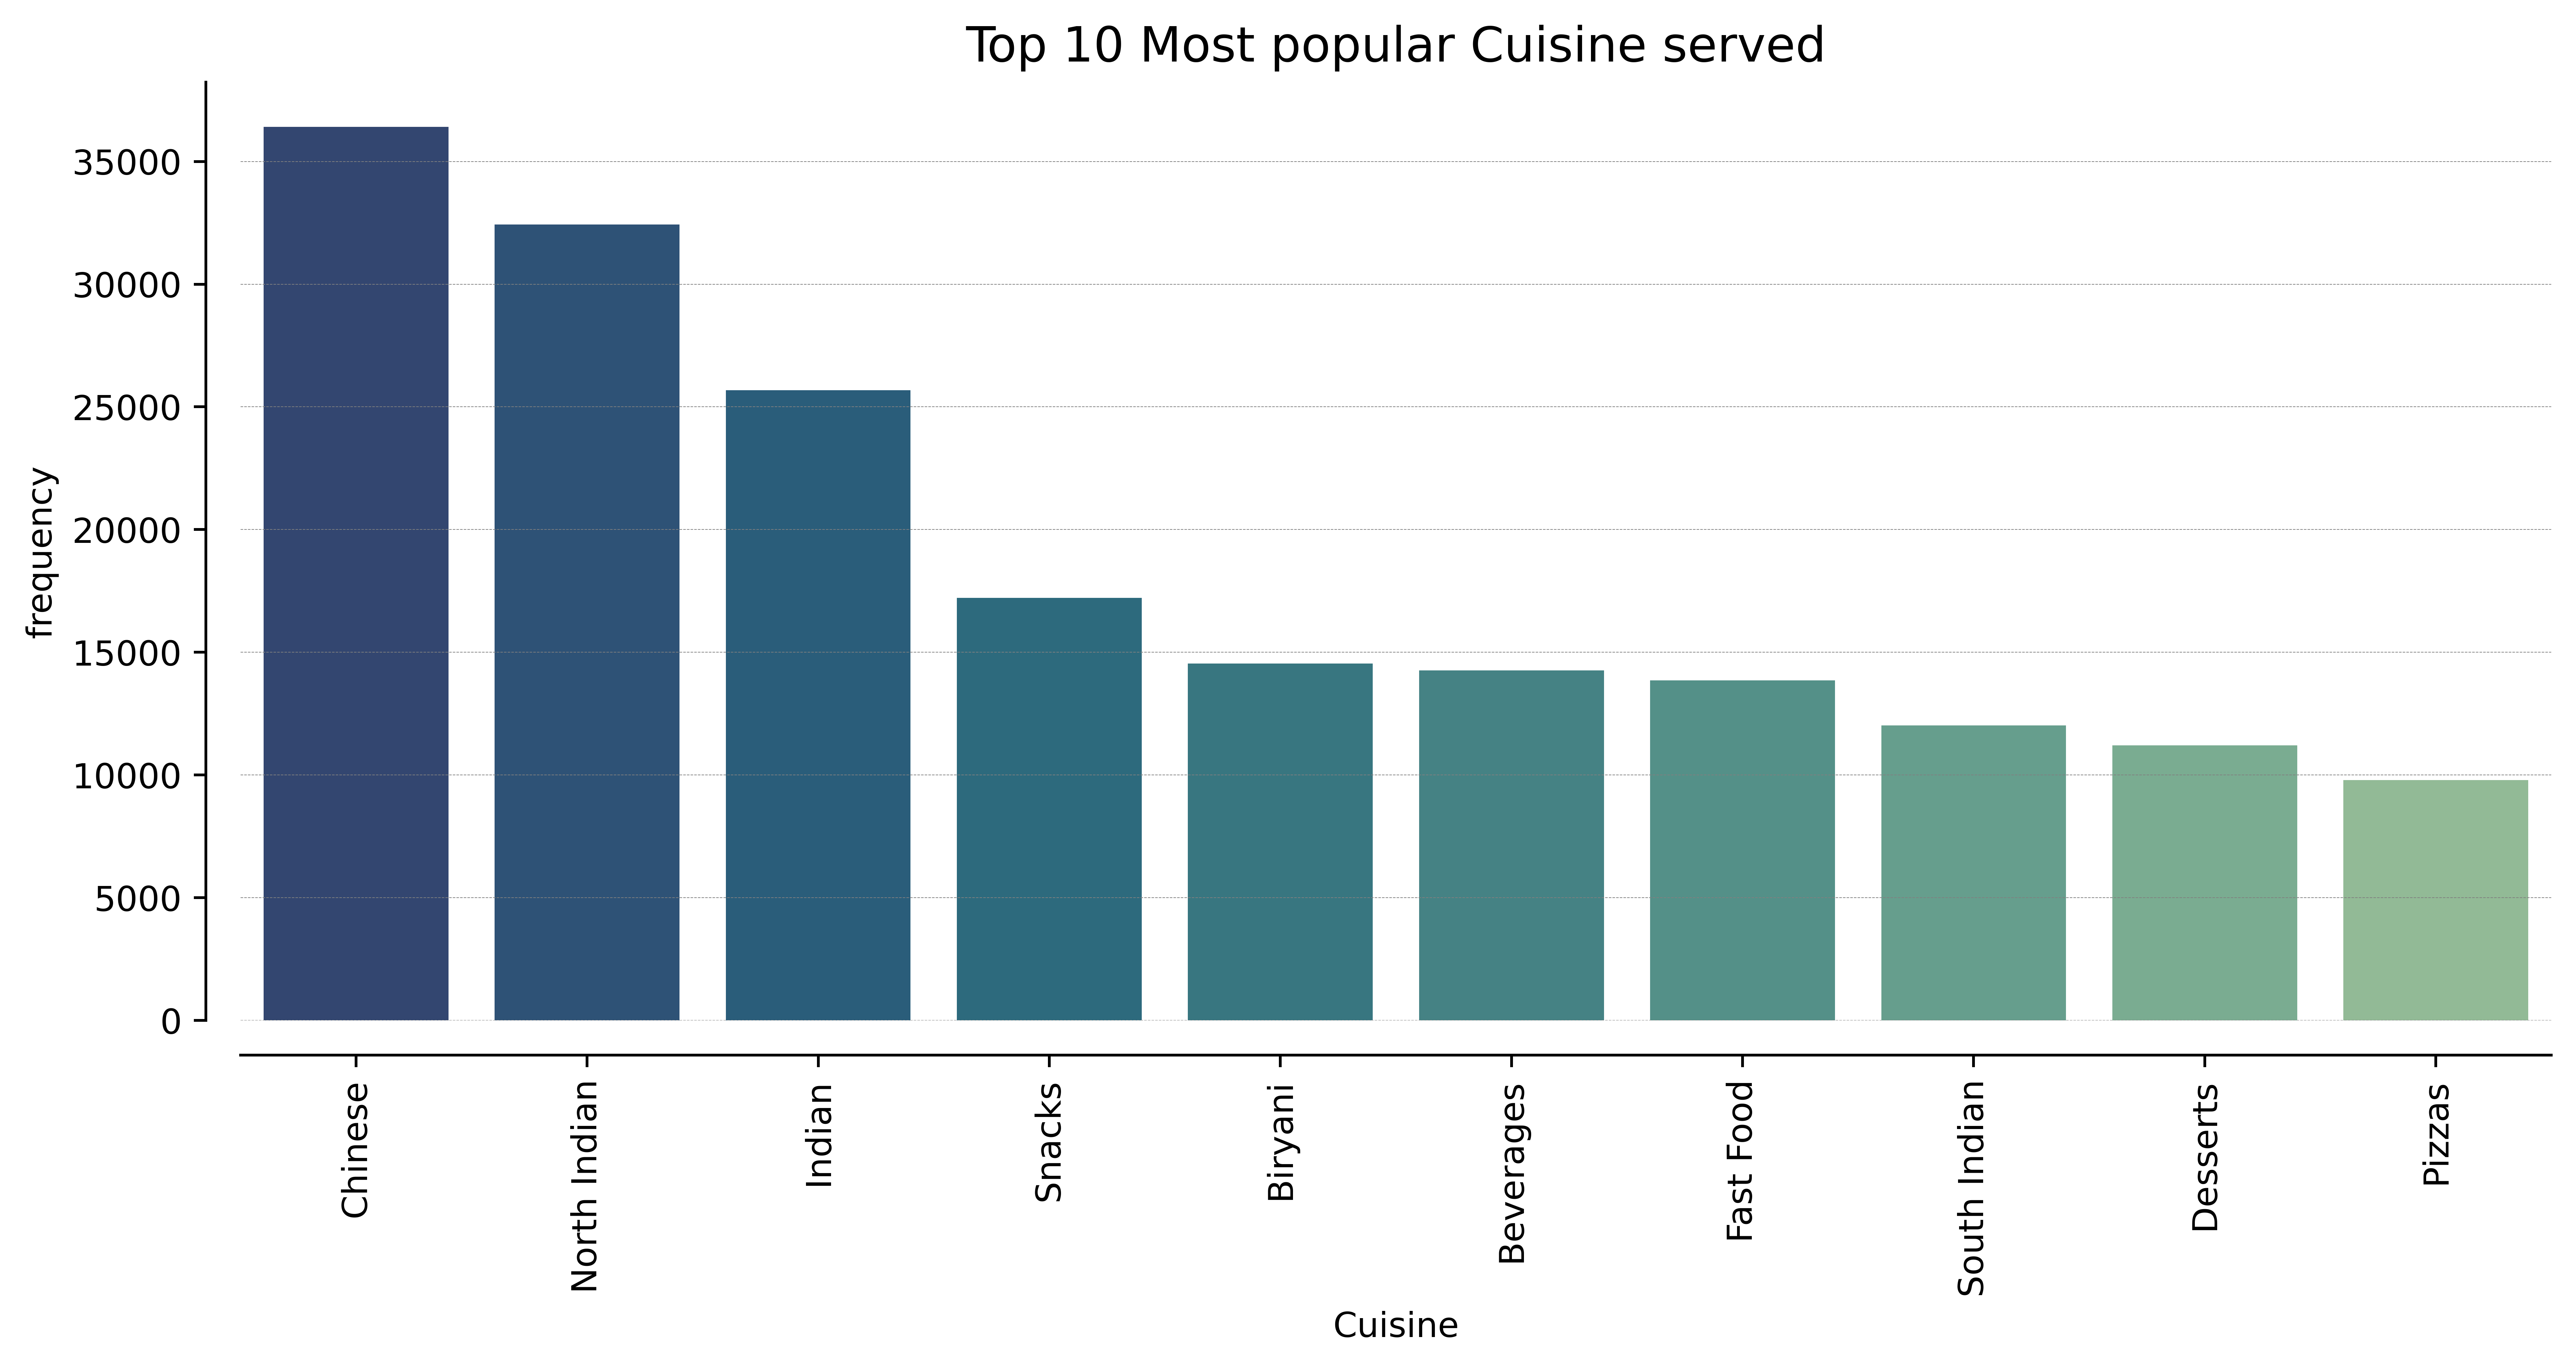

In [28]:
Cuisine = Cuisine.sort_values(by = 'Restaurant_Counts', ascending=False)

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=723)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = Cuisine.head(10),
           x='Cuisine',
           y = 'Restaurant_Counts',
           palette= "crest_r" #'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.2
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Cuisine", fontsize = 10)                                     # Set X label         
plt.ylabel("frequency", fontsize = 10)                                   # Set Y label
plt.title('Top 10 Most popular Cuisine served', fontsize = 14)          # Set title
plt.show()

## Cost
 
**Remove `₹` symbol from `cost` and convert to `numerical`**

In [29]:
df.cost = df.cost.str.split(' ',1, expand=True)[1].astype('int')
df.cost.dtypes

dtype('int64')

### 5. Which city is having the least expensive restaurant in terms of cost?
* `Hampi` is the least expensive city as per Restaurant Cost

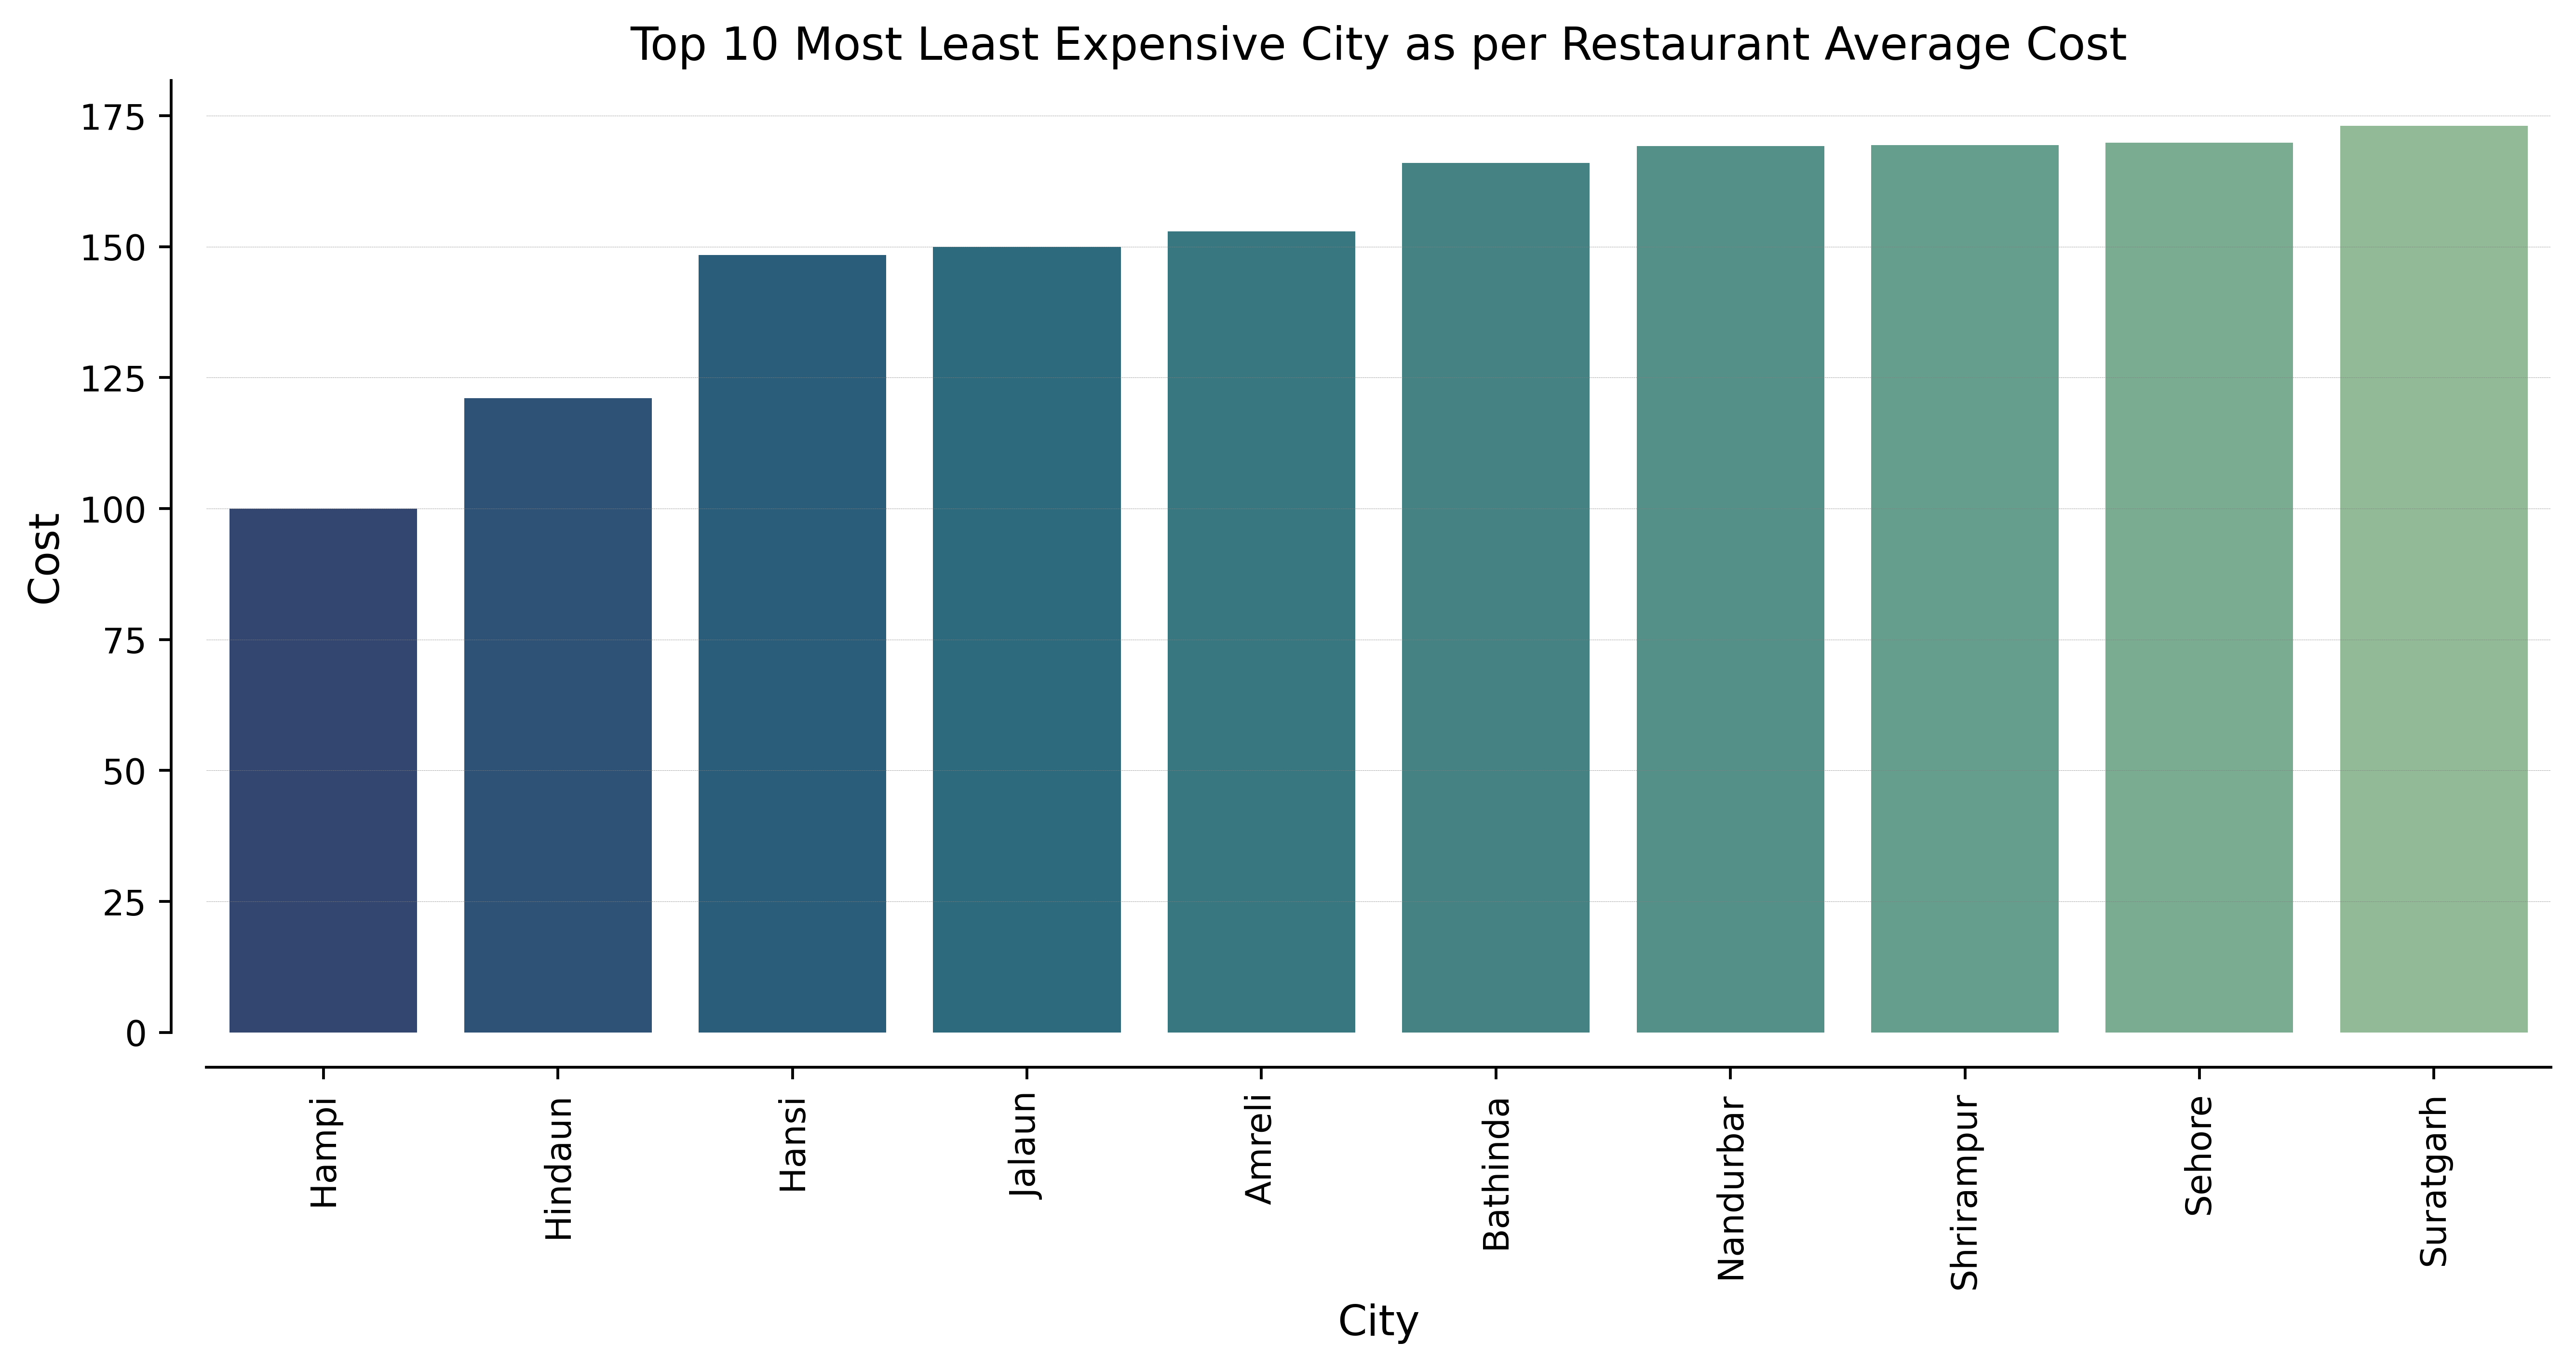

In [30]:
Expensive = df.groupby('City', as_index=False).agg('mean')[['City','cost']].sort_values(by='cost', ascending = True)


# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sn.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = Expensive.head(10),
           x='City',
           y = 'cost',
           palette= "crest_r" #'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.1
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("City", fontsize = 12)                             # Set X label         
plt.ylabel("Cost", fontsize = 12)                             # Set Y label
plt.title('Top 10 Most Least Expensive City as per Restaurant Average Cost', fontsize = 13)         # Set title
plt.show()

## Restaurant `id`
### 6. Top 5 most popular restaurant chains in India?
* Top 5 most popular restaurant chains in India are **`Domino's Pizza`, `Pizza Hut`, `KFC`, `Kwality Walls Frozen Dessert and Ice Cream Shop`, `Baskin Robbins`**.

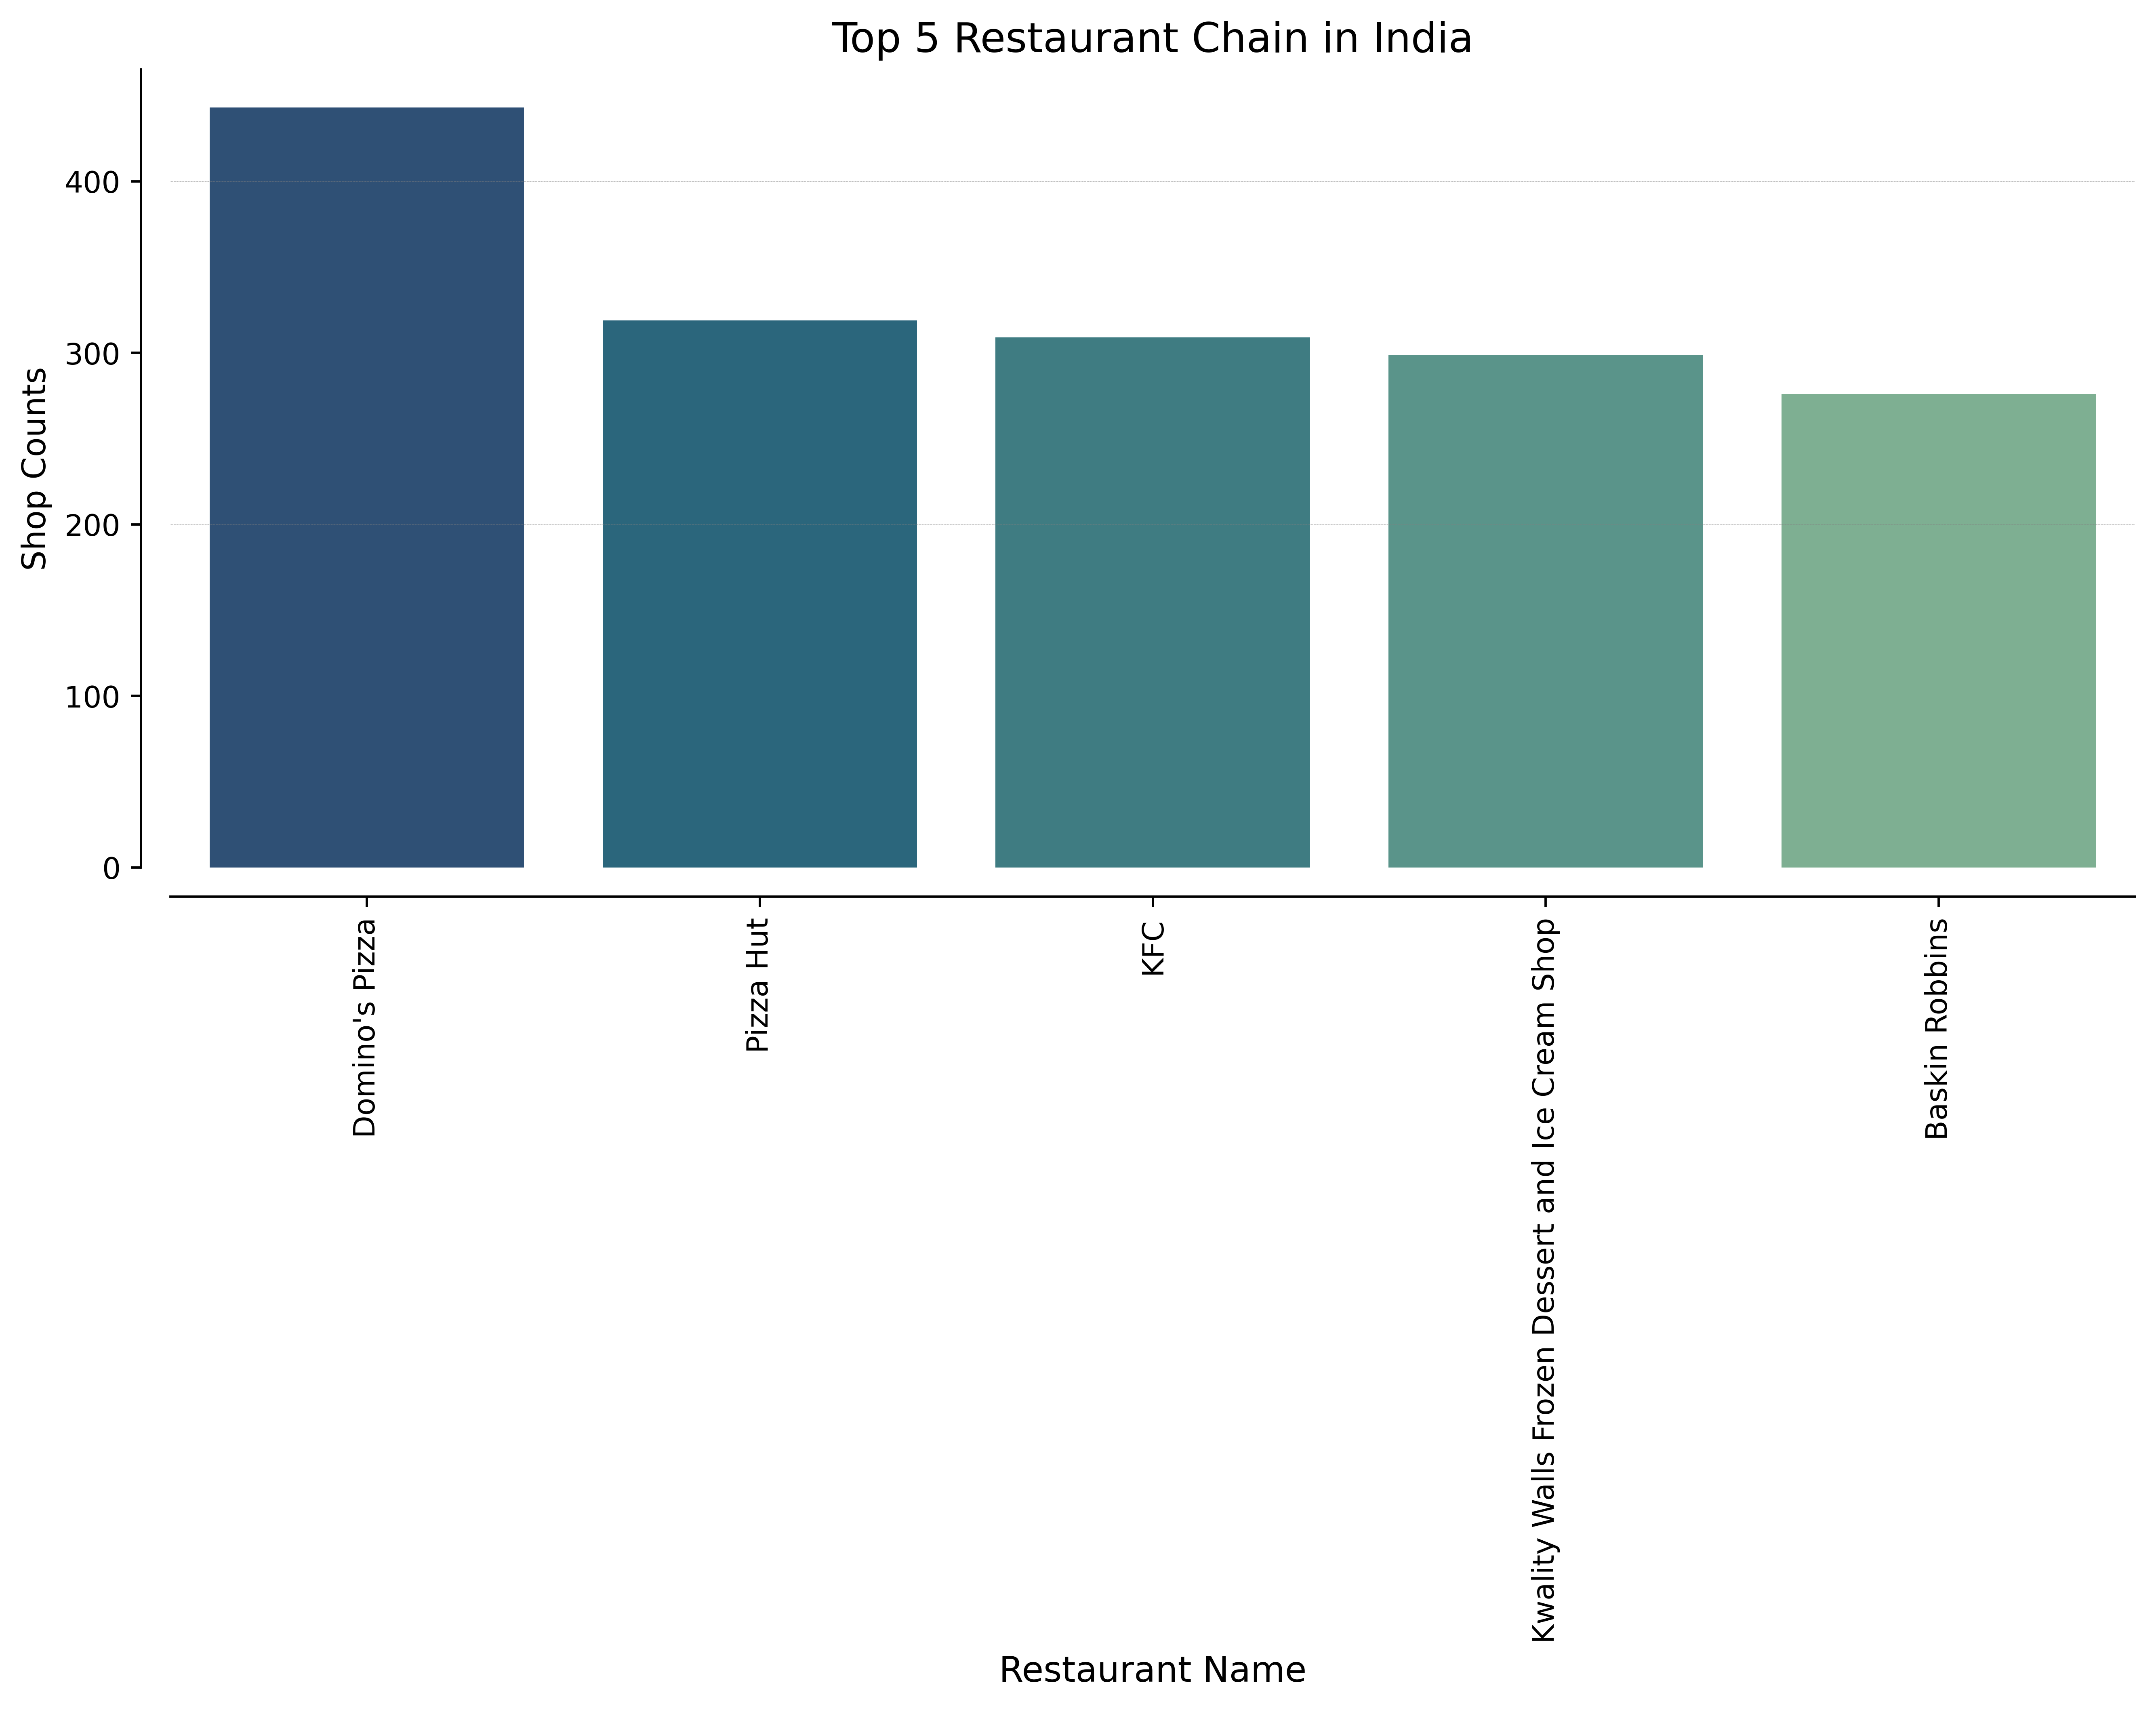

In [31]:
d = df.groupby('Restaurant', as_index=False).agg('count')[['Restaurant', 'id']].sort_values(by='id', ascending = False)

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = d.head(),
           x='Restaurant',
           y = 'id',
           palette= "crest_r" #'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.1
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Restaurant Name", fontsize = 12)                             # Set X label         
plt.ylabel("Shop Counts", fontsize = 11)                                 # Set Y label
plt.title('Top 5 Restaurant Chain in India', fontsize = 14)              # Set title
plt.show()

## rating_count
### 7. Which restaurant in Banglore has the most number of people visited?
Take a number of reviews for reference

In [32]:
df.rating_count.unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

#### Let's Create a `review` dictionary for each unique `rating_count` as keys and it's numerical part as it's values

In [33]:
review = {}
for rating in df.rating_count.unique():
    if rating == 'Too Few Ratings':
        review[rating] = 0
    else:
        try:
            review[rating] = int(rating.split('+')[0])
        except:
            if rating.split('+')[0][-1] == 'K':
                review[rating] = int(rating.split('+')[0][:-1])*1000
review

{'Too Few Ratings': 0,
 '50+ ratings': 50,
 '100+ ratings': 100,
 '20+ ratings': 20,
 '500+ ratings': 500,
 '1K+ ratings': 1000,
 '5K+ ratings': 5000,
 '10K+ ratings': 10000}

#### Let's add a `Reviews` column in the dataframe with the help `rating_count`.

In [34]:
reviews = []
for i in range(df.shape[0]):
    reviews.append(review[df.rating_count[i]])
print(len(reviews))
print(df.shape[0])

df['Reviews'] = reviews

148290
148290


In [35]:
d = df.sort_values(by = 'Reviews', ascending=False)[['Restaurant', 'SubRegion', 'City','rating', 'rating_count','Reviews']]
d[d.City == 'Bangalore'].head(10)

,Restaurant,SubRegion,City,rating,rating_count,Reviews
9653,Meghana Foods,Koramangala,Bangalore,4.3,5K+ ratings,5000
9644,Truffles,Koramangala,Bangalore,4.4,5K+ ratings,5000
14998,Leon Grill,Whitefield,Bangalore,4.3,5K+ ratings,5000
11067,Truffles,Mahadevpura,Bangalore,4.4,5K+ ratings,5000
18263,Truffles,"Sanjay Nagar, New BEL Road",Bangalore,4.4,5K+ ratings,5000
23739,Truffles,Central Bangalore,Bangalore,4.5,5K+ ratings,5000
10582,Truffles,JP Nagar,Bangalore,4.4,5K+ ratings,5000
15883,Truffles,Kammanahalli/Kalyan Nagar,Bangalore,4.4,5K+ ratings,5000
20269,The Bowl Company,Marathahalli,Bangalore,4.3,5K+ ratings,5000
12345,Mani's Dum Biryani,Arekere,Bangalore,4.2,1K+ ratings,1000


#### The most visited Restaurants as per reviews are :
 * `Meghana Foods`
 * `Truffles`
 * `Leon Grill`
 * `The Bowl Company`

### Most Popular Restaurants in Banglore

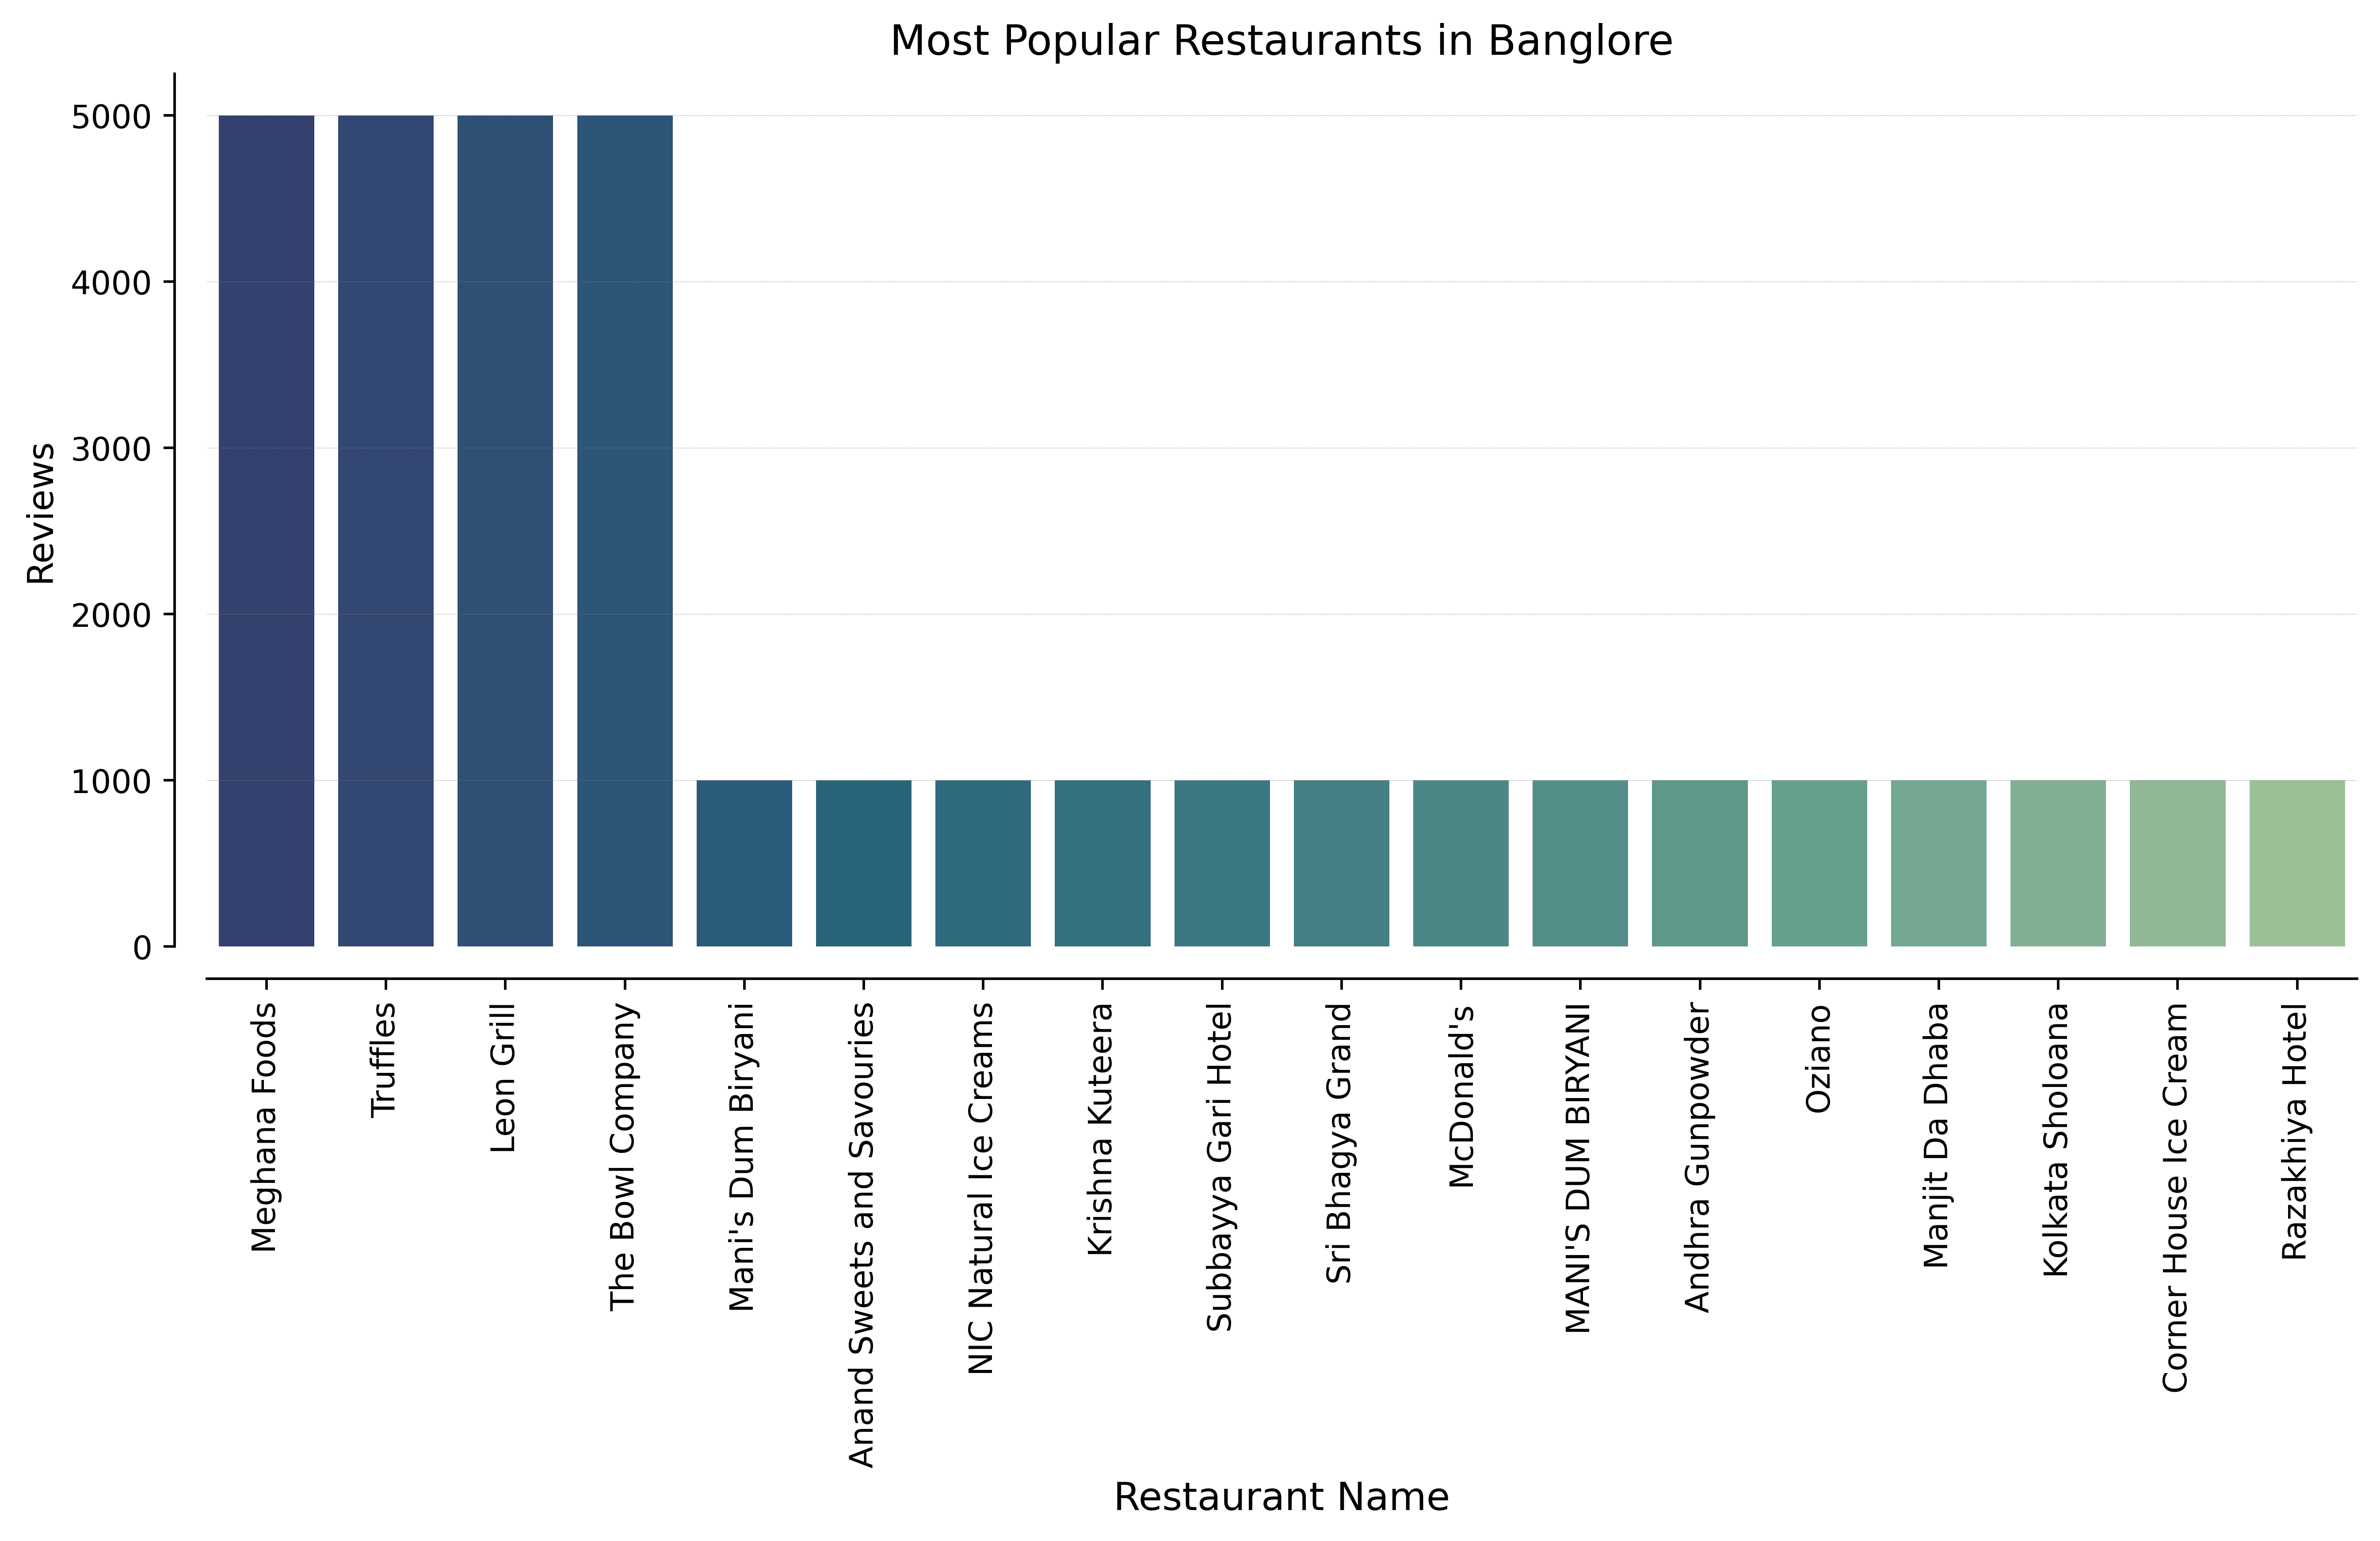

In [36]:
d = df.sort_values(by = 'Reviews', ascending=False)[['Restaurant', 'SubRegion', 'City', 'rating_count','Reviews']]

# Adjust the size and view of plot
plt.figure(figsize=(12,5), dpi=523)                                       
#sns.set_style('whitegrid') 

# Seaborn Bar plot
sns.barplot(data = d[d.City == 'Bangalore'].head(25),
           x='Restaurant',
           y = 'Reviews',
           palette= "crest_r" #'plasma'
          )     


# Set horizontal grid lines
plt.grid(True, axis = 'y',                                                 
         color = 'gray', 
         linestyle = '--',  
         linewidth=0.1
        ) 
# Remove vertical grid lines
plt.grid(False, axis = 'x')                                   

# Remove boundry line, set Offset & trim the corner
sns.despine(offset=10, trim=False)

# Rotate the x tick value by 90 degree for better view
plt.xticks(rotation = 90)                                     

plt.xlabel("Restaurant Name", fontsize = 12)                                 # Set X label         
plt.ylabel("Reviews", fontsize = 11)                                         # Set Y label
plt.title('Most Popular Restaurants in Banglore', fontsize = 13)             # Set title
plt.show()

## Optional

### 1. Restaurant with Maximum Rating in Abohar
* Restaurant with Maximum Rating in `Abohar` is `FOODY MOOD`

In [37]:
Abohar = df[df['City'] == 'Abohar']
Abohar[Abohar['rating'] == Abohar['rating'].max()][['Restaurant','City','rating']]

,Restaurant,City,rating
20,FOODY MOOD,Abohar,4.7


### 2. Top 10 Restaurant in Abohar w.r.t rating

In [38]:
Top = df.City.value_counts(ascending=False).reset_index().rename({'index':'City', 'City':'Counts'}, axis=1).head(10)

fig =px.bar(Abohar.sort_values(by='rating',ascending = False).head(10),
            x= 'Restaurant',
            y= 'rating',
            labels = {'Restaurant':'Top 10 Restaurants in Abohar','rating':'Rating'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.Bold,
            title='<b>Top 10 Restaurant in Abohar w.r.t rating')

fig.show()

### 3. Number of cities (including subregions) where swiggy is having their restaurants listed?
* There are `820` Cities (including subregions) where swiggy is having their restaurants listed.

In [39]:
# In SubRegion column contains City name also.
df['SubRegion'].nunique()       # Noida & Noida-1 are same city to count reduce by 1

820

### 4. Number of cities (don't include subregions) where swiggy is having their restaurants listed?
* There are `551` cities, where swiggy is having their restaurants listed.

In [40]:
# City column contains only the main city name
df['City'].nunique()           # Noida & Noida-1 are same city to count reduce by 1

551

### 5. The city with the maximum number of restaurants listed on Swiggy?
* `Bangalore` has the maximum number of restaurants listed on Swiggy.

In [41]:
df.groupby('City')['Restaurant'].count().sort_values(ascending=False).reset_index(name='Restaurants counts').head()

,City,Restaurants counts
0,Bangalore,15288
1,Delhi,14048
2,Pune,12412
3,Hyderabad,9996
4,Chennai,9940


### Top 20 City w.r.t Restaurants Counts

In [42]:
d =df.groupby('City')['Restaurant'].count().sort_values(ascending=False).reset_index(name='Restaurants counts')

fig =px.bar(d.head(20),
            x= 'City',
            y= 'Restaurants counts',
            labels = {'City':'Top 20 City','Restaurants counts':'Restaurants Counts'},
            template='plotly_dark',
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Top 20 City w.r.t Restaurants Counts')

fig.show()